Milestone 2: Data Manipulation & Data Visualization 

Rohit Vakkalagadda (rv324@cornell.edu) Kaitlyn Lu (kl995@cornell.edu) Lucas He (th689@cornell.edu)


Data Manipulation: implement a function for each of the following, and create 3+ tests per part as you go.
- Given a dataframe, removes all rows that have NaN data.
- Given a dataframe, replace all NaNs with a summary statistic of your choice.
- Given a column of categorical data and an exhaustive list of labels, returns a one-hot encoding.
- Load the dataset from your directory into a pandas dataframe.
  * Clean your dataset by removing or replacing NaNs.
  * Report any summary statistics about your dataframe.
    1. For each numerical column, mean, median, min, max, std.
    2. For each categorical column, unique values, counts of each.

In [4]:
# Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os



In [5]:
# Remove NaN functions

# Given a dataframe, removes all rows that have NaN data.
def remove_nan_rows(df):
    return df.dropna(axis = 0)

# Given a dataframe, replace all NaNs with a summary statistic of your choice.
def replace_nan_with_mean(df):
    df_copy = df.copy()
    for col in df_copy.columns:
        if df_copy[col].isna().any():
            df_copy[col].fillna(df_copy[col].mean(), inplace=True)
    return df_copy

# Given a column of categorical data and an exhaustive list of labels, returns a one-hot encoding.
def one_hot_encode(column, labels):
    return pd.get_dummies(column, prefix=column.name).reindex(columns=[f"{column.name}_{label}" for label in labels], fill_value=0)


In [6]:
# Import Data set and clean 

df = pd.read_csv('atp_matches_2024.csv')
# Replace NaN values with mean
df = df.drop(columns=['winner_seed', 'winner_entry', 'loser_seed', 'loser_entry'])
df = remove_nan_rows(df)
print(df.columns)
print(df.shape)
df.head()

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_name',
       'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points'],
      dtype='object')
(2761, 45)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,Grigor Dimitrov,R,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,Holger Rune,R,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,Grigor Dimitrov,R,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,Holger Rune,R,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,Roman Safiullin,R,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


In [26]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.min_rows', None)

# Summary Statistics

def summarize(df):
    df = remove_nan_rows(df)

    # Separate numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(exclude=['number']).columns

    # Summary statistics for numerical columns
    # numerical_summary = df[numerical_columns].describe().T

    # Summary statistics for categorical columns (Unique values & value counts)
    # categorical_summary = {col: df[col].value_counts() for col in categorical_columns}

    # Display categorical summaries
    # for col, counts in categorical_summary.items():
    #     print(f"\nSummary for {col}:")
    #     #print(f"Unique values: {df[col].nunique()}")
    #     print(counts)

    # Separate numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(exclude=['number']).columns


    # Create mean DataFrames for each surface
    mean_hard = df[df['surface'] == 'Hard'][numerical_columns].mean().round(2)
    mean_clay = df[df['surface'] == 'Clay'][numerical_columns].mean().round(2)
    mean_grass = df[df['surface'] == 'Grass'][numerical_columns].mean().round(2)
    
    # Combine into one DataFrame
    mean_df = pd.concat(
        [mean_hard, mean_clay, mean_grass], 
        axis=1, 
        keys=['Hard', 'Clay', 'Grass']
    )

    # Compute variance column: sum of 3 pairwise squared differences
    variance = (
        (mean_df['Hard'] - mean_df['Clay']) ** 2 +
        (mean_df['Clay'] - mean_df['Grass']) ** 2 +
        (mean_df['Grass'] - mean_df['Hard']) ** 2
    ).round(4)

    mean_df['Variance'] = variance

    # Display the combined DataFrame
    display(mean_df)
    
    

summarize(df)

,Hard,Clay,Grass,Variance
draw_size,61.82,59.24,69.50,1.709064e+02
tourney_date,20240597.95,20240455.11,20240658.12,6.523675e+04
match_num,262.01,263.60,245.96,5.713002e+02
winner_id,157592.10,154234.74,153860.24,2.533890e+07
winner_ht,188.15,186.88,188.88,6.145800e+00
winner_age,26.24,26.52,26.76,4.064000e-01
loser_id,154782.79,152947.27,154764.50,6.671793e+06
loser_ht,186.76,186.19,187.38,2.125400e+00
loser_age,26.70,26.83,26.82,3.140000e-02
best_of,3.32,3.00,3.78,9.224000e-01


Data Visualization: For your cleaned dataset do the following. You do not need
to run tests for these, but save them using plt.savefig(). What patterns or
relationships do you notice?  
a. For each numerical column, create a histogram (with labels) of the data.  
b. For each categorical column, create a bar graph (with labels + coloring).  
c. Select 3+ pairs of numerical and categorical columns, and for each
generate and save a violin plot.  
d. Select 3+ pairs of numerical columns, and for each create scatter/joint
plots for each.  
e. Create a confusion matrix or correlation plot for a set of features. To
include categorical features, you may want to use your one-hot encoding
from above.  
f. Investigate an interesting pattern or relationship you observe and create 2
more plots of your choice!  

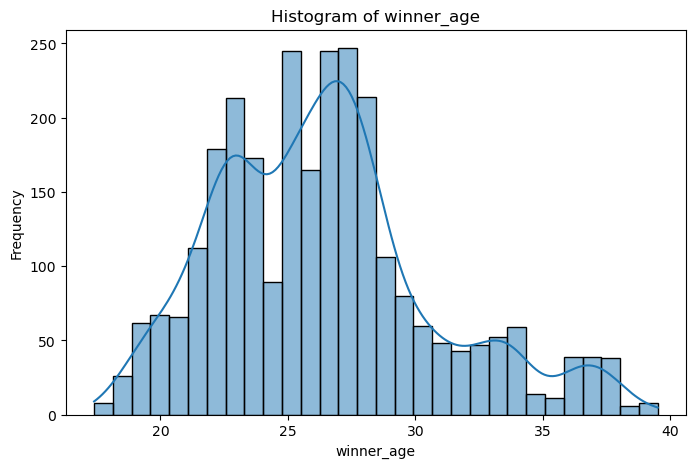

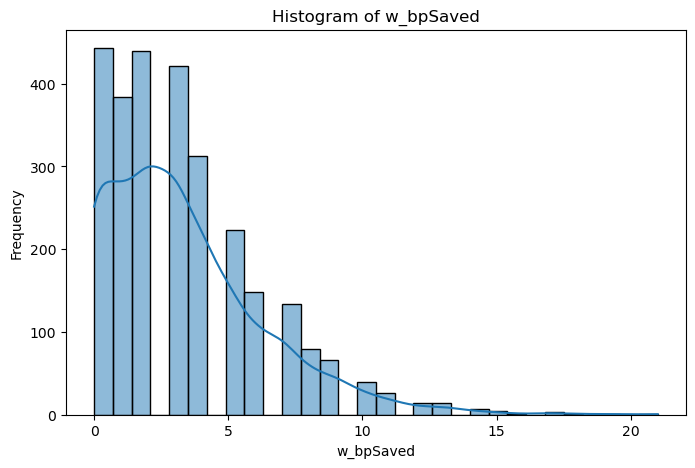

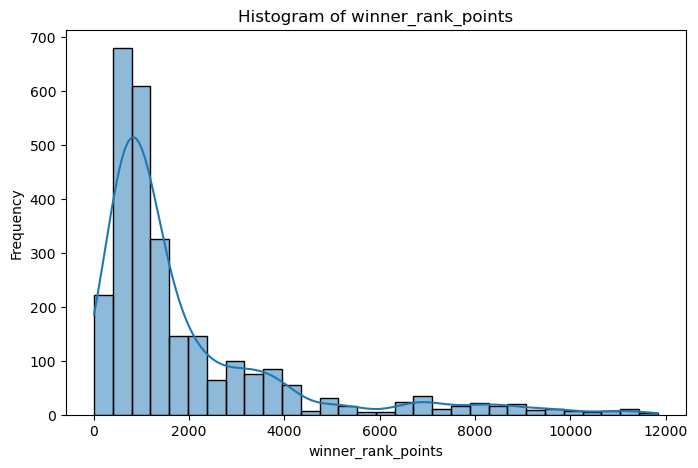

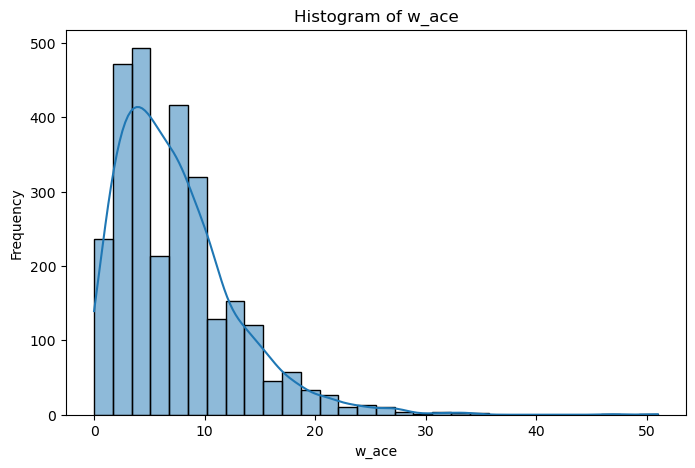

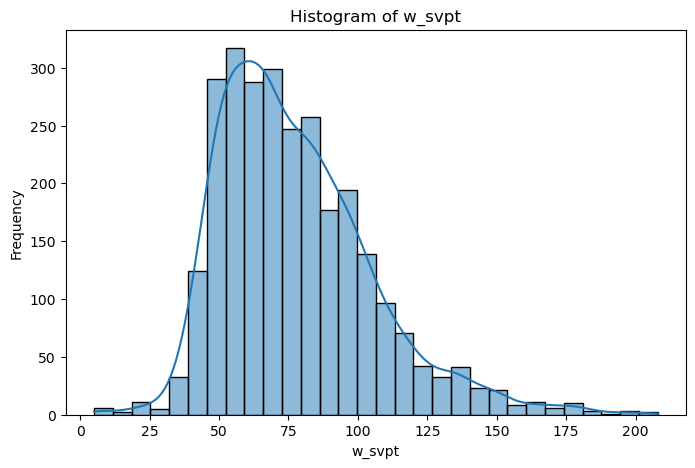

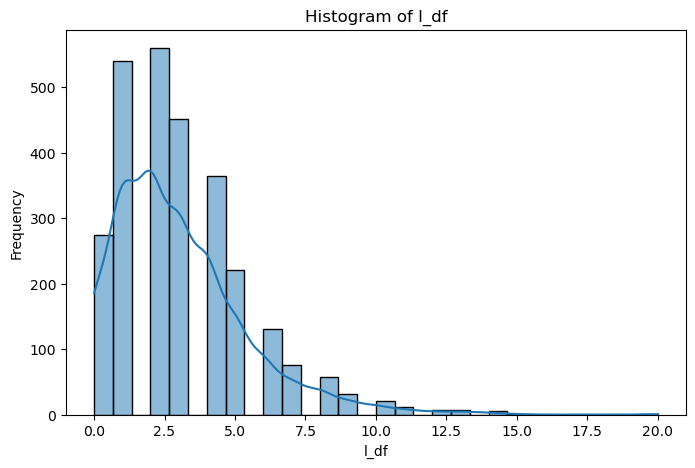

/var/folders/47/rhmf93150_g8hzspfh2dtn500000gn/T/ipykernel_33774/2494995402.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_30, palette='viridis')


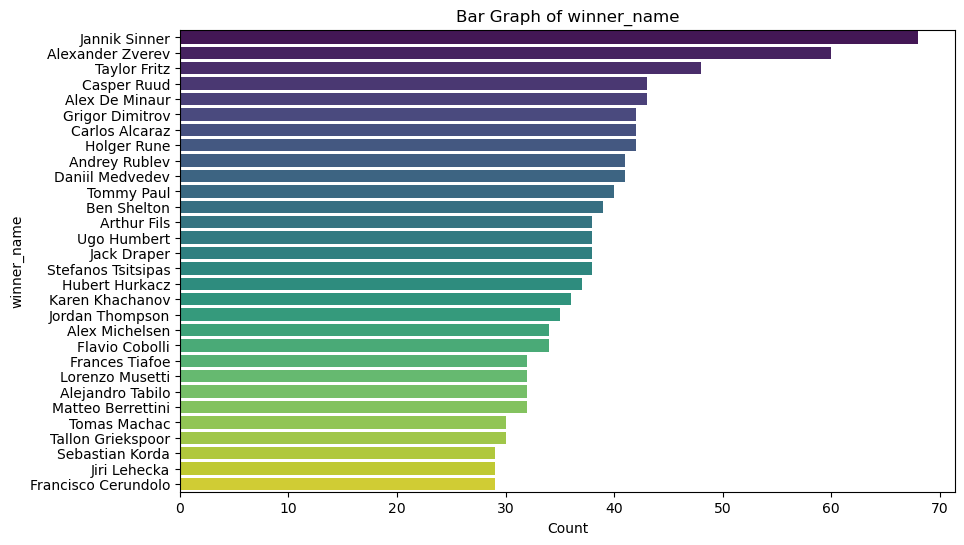

/var/folders/47/rhmf93150_g8hzspfh2dtn500000gn/T/ipykernel_33774/2494995402.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_30, palette='viridis')


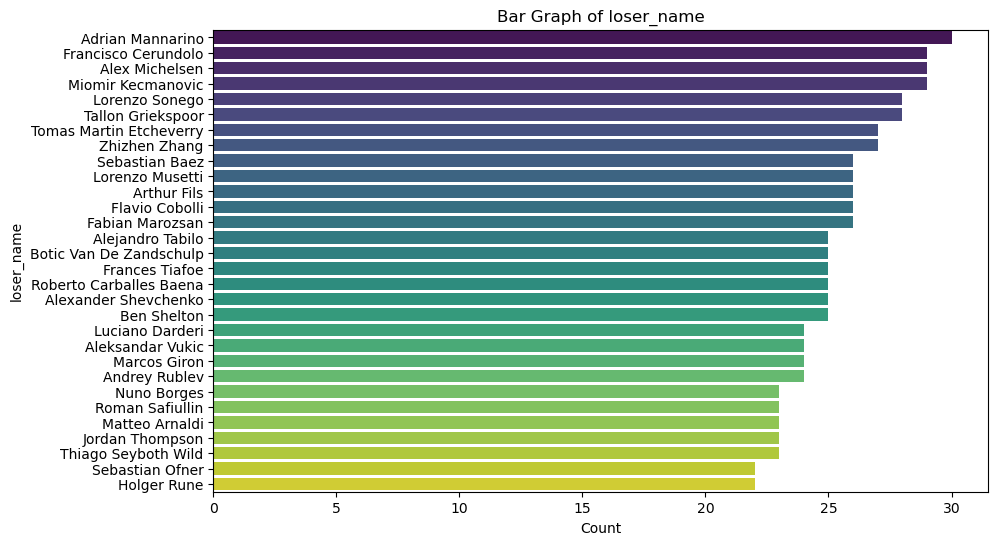

/var/folders/47/rhmf93150_g8hzspfh2dtn500000gn/T/ipykernel_33774/2494995402.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x=cat_col, y=num_col, palette="coolwarm")


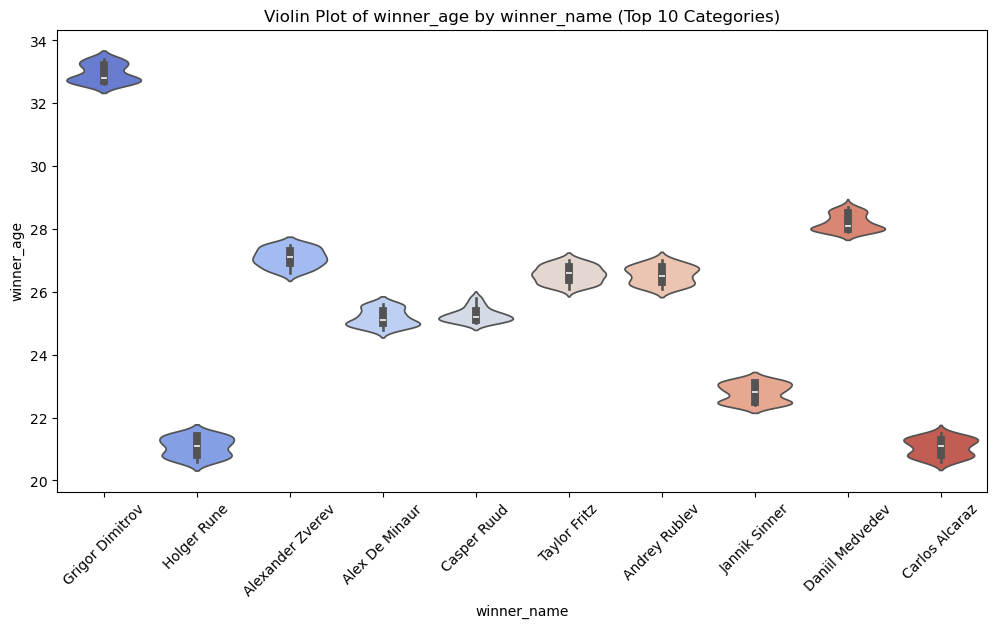

/var/folders/47/rhmf93150_g8hzspfh2dtn500000gn/T/ipykernel_33774/2494995402.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x=cat_col, y=num_col, palette="coolwarm")


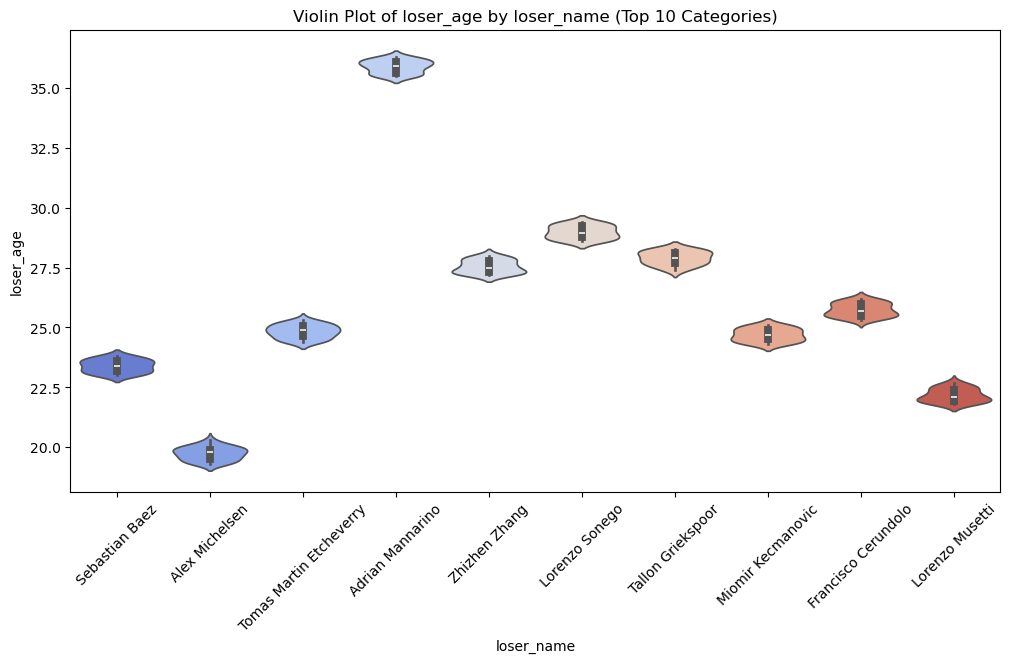

/var/folders/47/rhmf93150_g8hzspfh2dtn500000gn/T/ipykernel_33774/2494995402.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x=cat_col, y=num_col, palette="coolwarm")


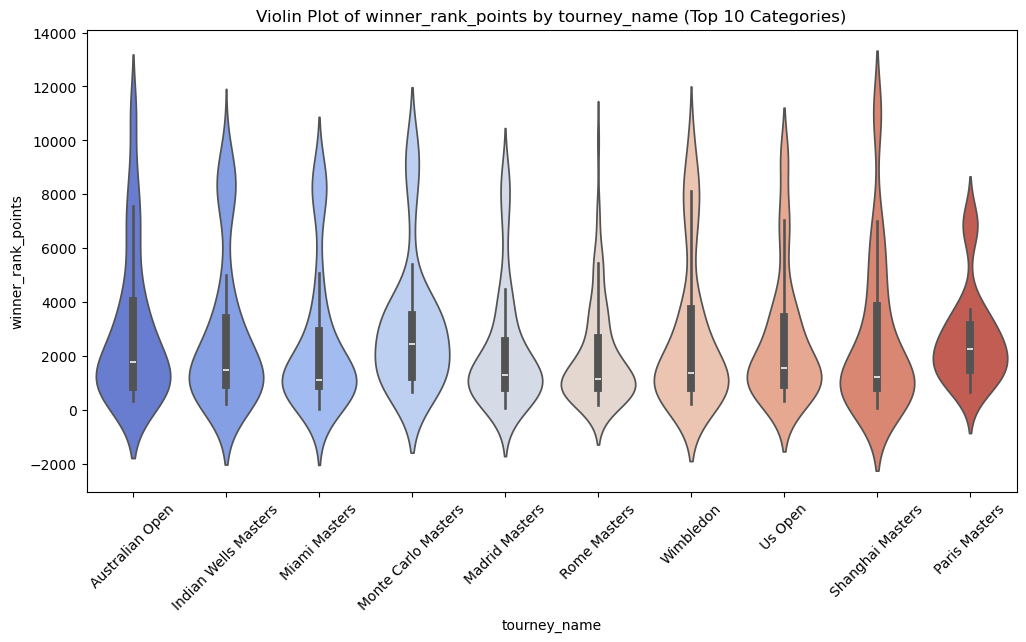

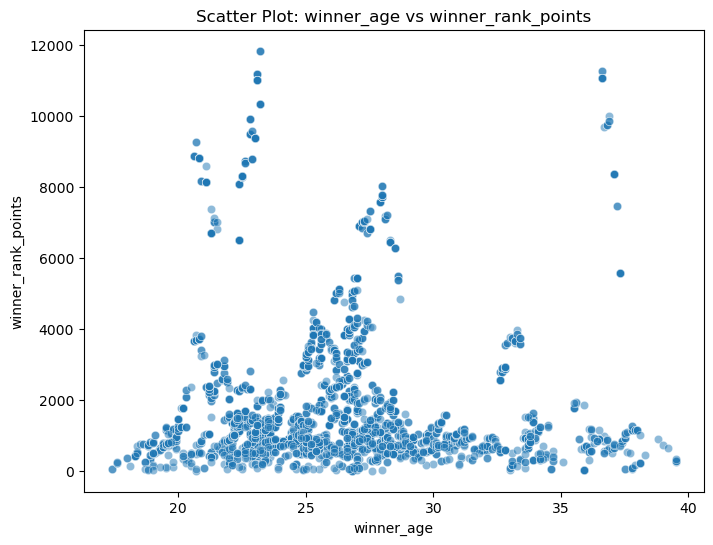

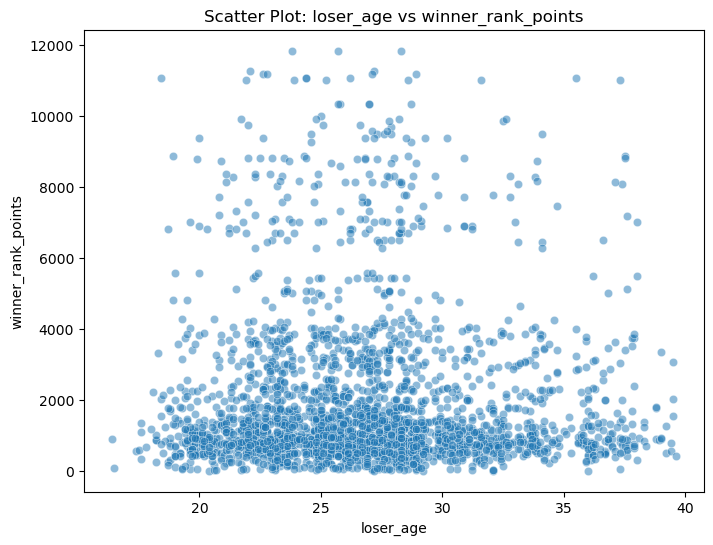

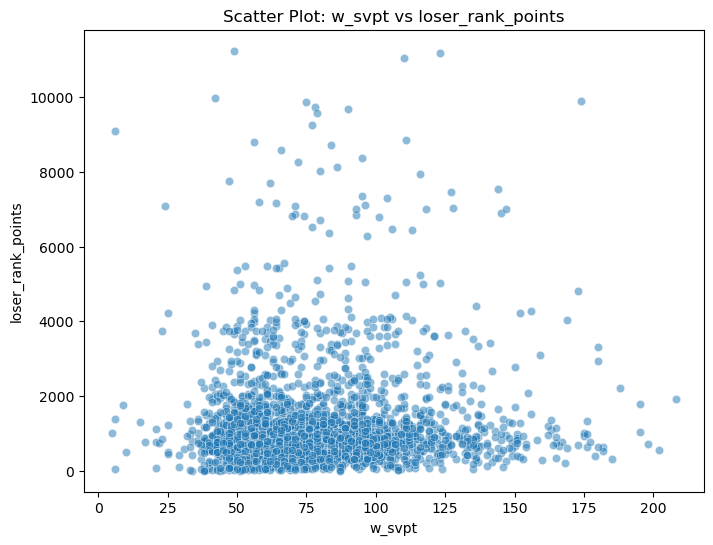

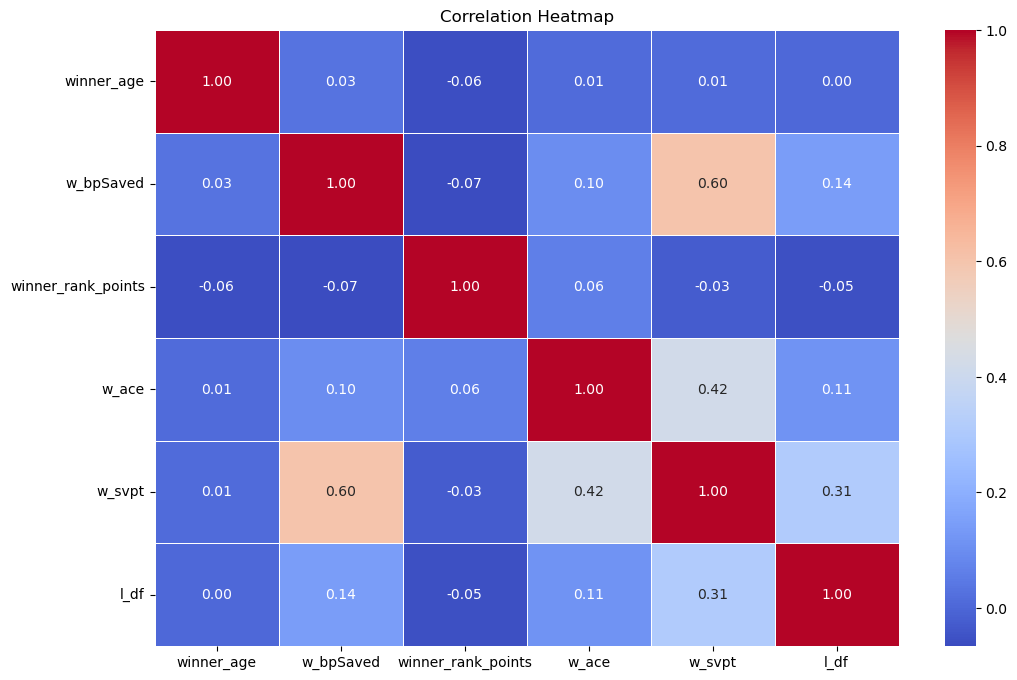

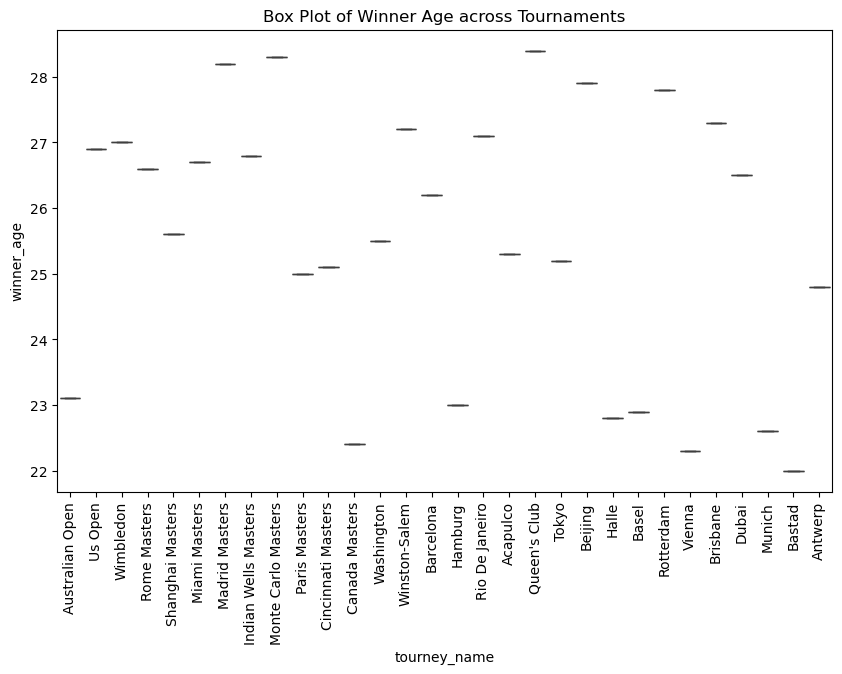

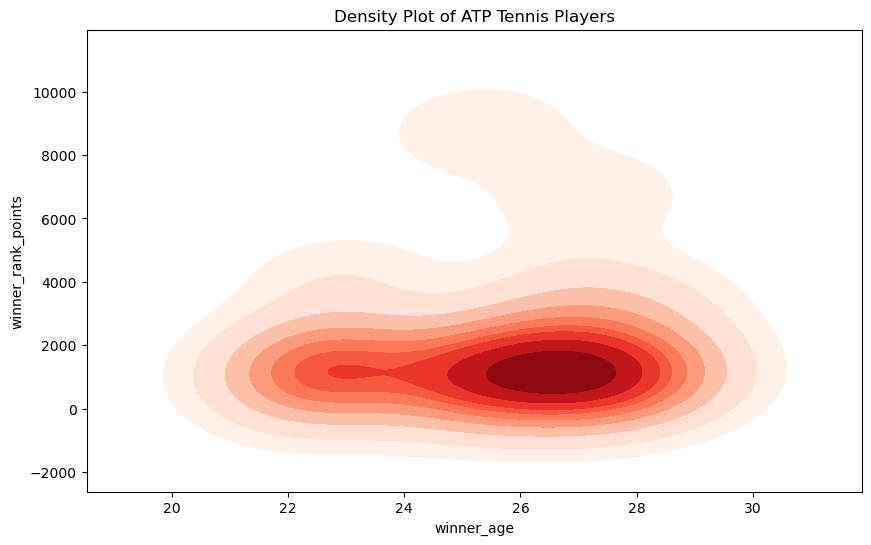

In [54]:
# Create a folder to save plots
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

def plotting(df):
    # Histogram for each numerical column
    numerical_cols = ['winner_age', 'w_bpSaved', 'winner_rank_points', 'w_ace', 'w_svpt', 'l_df']
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.savefig(f'{plot_dir}/histogram_{col}.png')
        plt.show()

    # Bar graphs for each categorical column
    categorical_cols = ['winner_name', 'loser_name']
    # I tried the other categorical columns, they don't make sense for a bar graph
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        top_30 = df[col].value_counts().nlargest(30).index
        sns.countplot(y=df[col], order=top_30, palette='viridis')
        plt.title(f'Bar Graph of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.savefig(f'{plot_dir}/bargraph_{col}.png')
        plt.show()
        plt.close()

    # Violin plots for selected pairs (categorical vs numerical)
    violin_categorical = ['winner_name', 'loser_name', 'tourney_name']
    violin_numerical = ['winner_age', 'loser_age', 'winner_rank_points']

    for cat_col, num_col in zip(violin_categorical, violin_numerical):
        top_10_categories = df[cat_col].value_counts().nlargest(10).index  # Get top 30 categories
        subset_df = df[df[cat_col].isin(top_10_categories)]  # Filter dataset to only include these categories

        plt.figure(figsize=(12, 6))
        sns.violinplot(data=subset_df, x=cat_col, y=num_col, palette="coolwarm")
        plt.title(f'Violin Plot of {num_col} by {cat_col} (Top 10 Categories)')
        plt.xticks(rotation=45)
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()
        plt.savefig(f'{plot_dir}/violin_{num_col}_by_{cat_col}.png')
        plt.close()

    # Scatter plots for selected numerical pairs
    selected_num_pairs = [('winner_age', 'winner_rank_points'), ('loser_age', 'winner_rank_points'), ('w_svpt', 'loser_rank_points')]

    for x_col, y_col in selected_num_pairs:
        plt.figure(figsize=(8, 6))
        top_x_values = df[x_col]
        top_y_values = df[y_col]
        subset_df = df[(df[x_col].isin(top_x_values)) & (df[y_col].isin(top_y_values))]
        sns.scatterplot(x=subset_df[x_col], y=subset_df[y_col], alpha=0.5)
        plt.title(f'Scatter Plot: {x_col} vs {y_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.savefig(f'{plot_dir}/scatter_{x_col}_vs_{y_col}.png')
        plt.show()
        plt.close()
    

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    corr_matrix = df[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.savefig(f'{plot_dir}/correlation_heatmap.png')
    plt.show()
    plt.close()

    # Additional Plots
    # Plot 1: Box plot of Winner Age across Tournaments
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['tourney_name'].value_counts().nlargest(30).index, y=df['winner_age'].value_counts().nlargest(30).index)
    plt.xticks(rotation=90)
    plt.title('Box Plot of Winner Age across Tournaments')
    plt.savefig(f'{plot_dir}/boxplot_age_by_tourney.png')
    plt.show()
    plt.close()

    # Plot 2: KDE plot of age across rank points
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x=df['winner_age'].value_counts().nlargest(30).index, y=df['winner_rank_points'].value_counts().nlargest(30).index, cmap="Reds", fill=True)
    plt.title('Density Plot of ATP Tennis Players')
    plt.savefig(f'{plot_dir}/kde_tennis_players.png')
    plt.show()
    plt.close()

plotting(df)

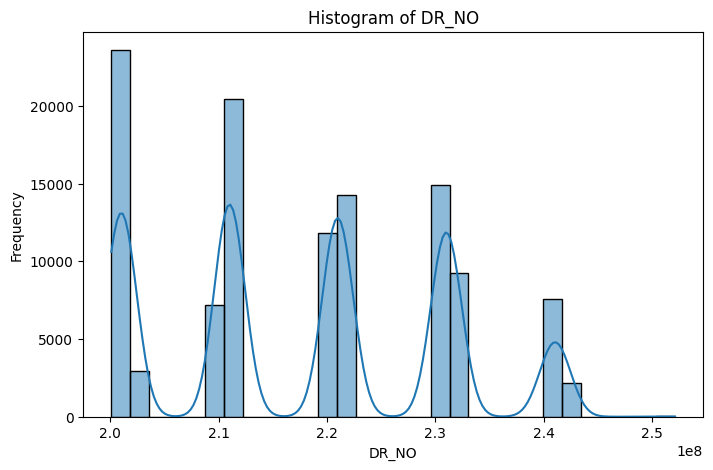

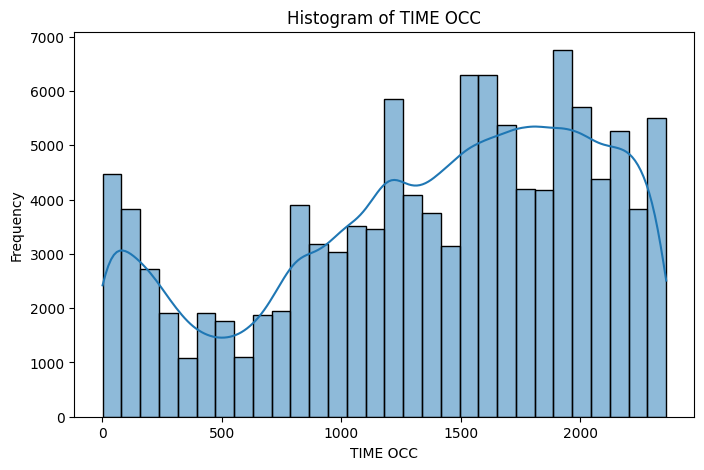

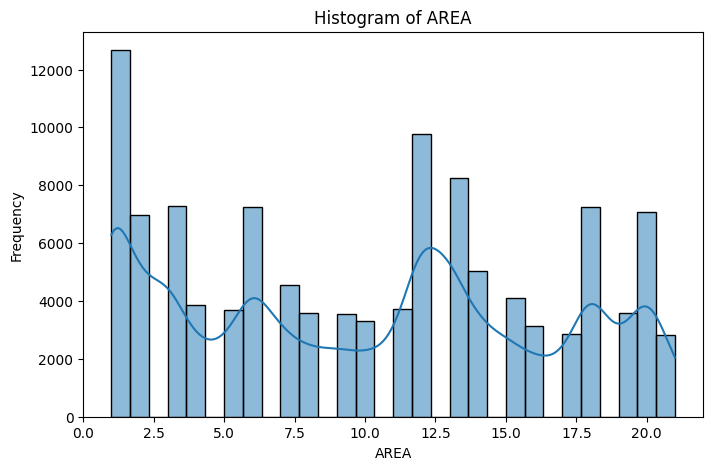

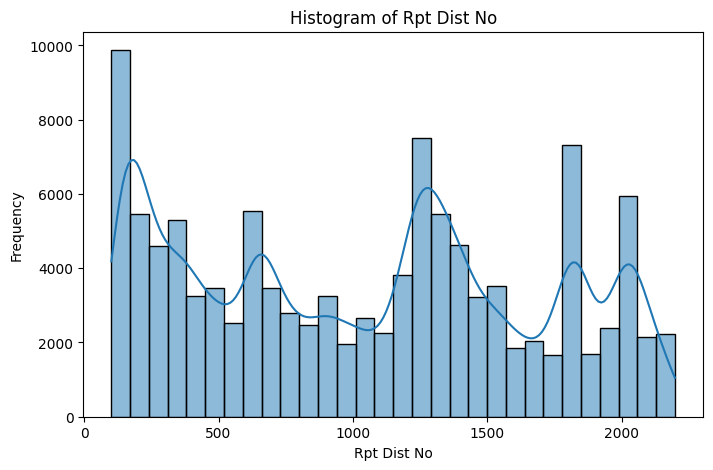

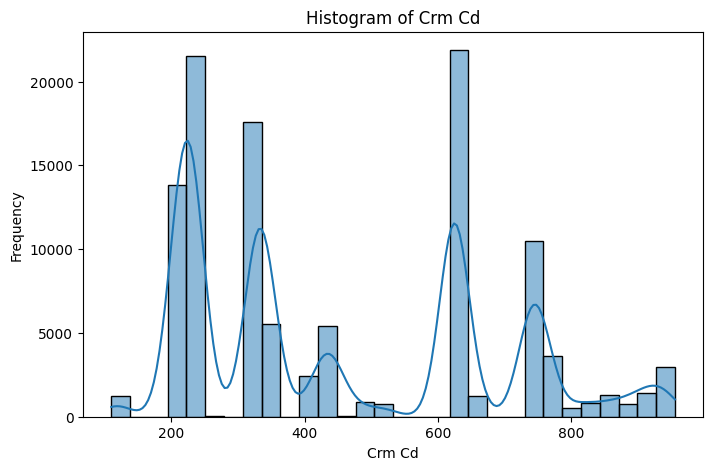

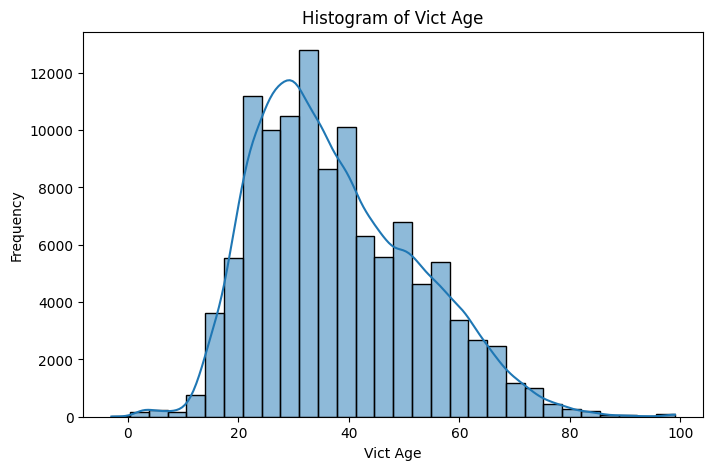

/var/folders/wp/q9yqmlps5m104gvw87tpz3hm0000gn/T/ipykernel_29178/3636060484.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_30, palette='viridis')


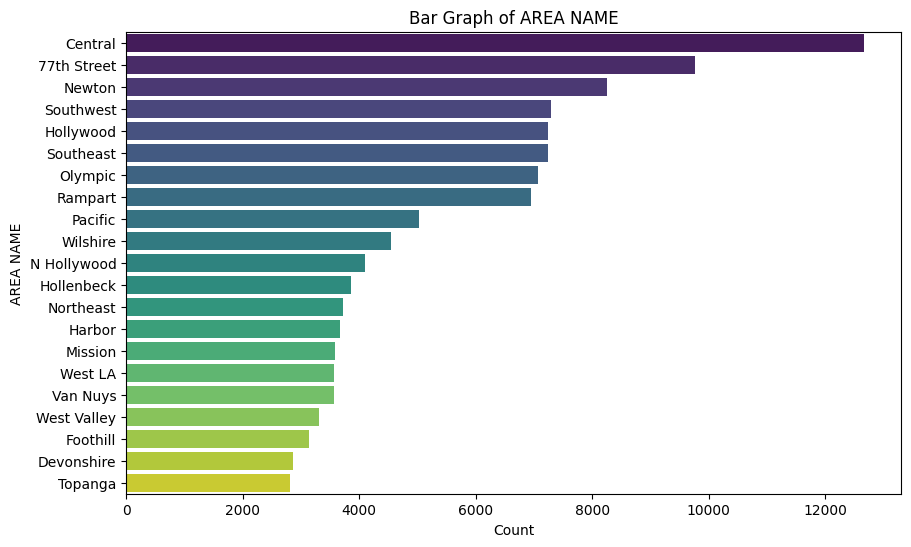

/var/folders/wp/q9yqmlps5m104gvw87tpz3hm0000gn/T/ipykernel_29178/3636060484.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x=cat_col, y=num_col, palette="coolwarm")


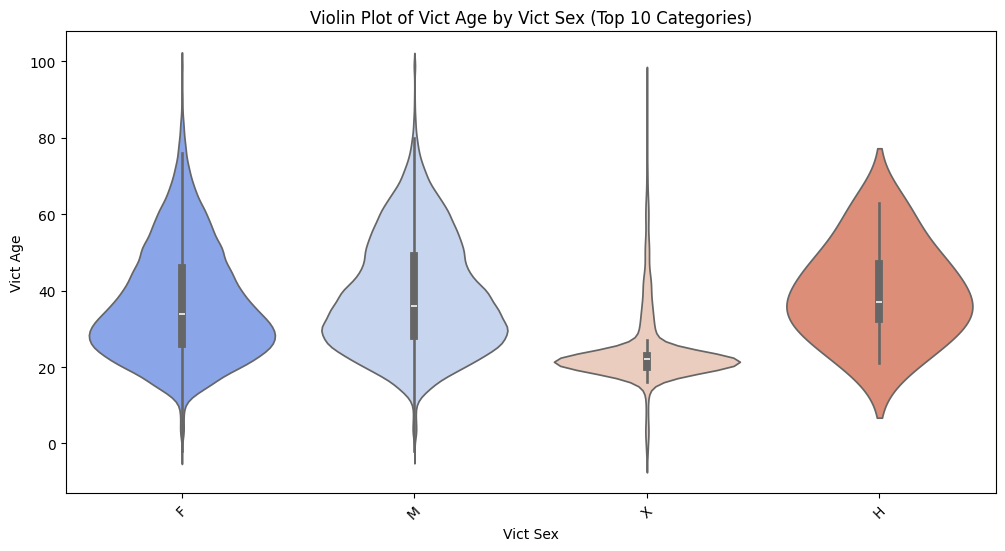

/var/folders/wp/q9yqmlps5m104gvw87tpz3hm0000gn/T/ipykernel_29178/3636060484.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x=cat_col, y=num_col, palette="coolwarm")


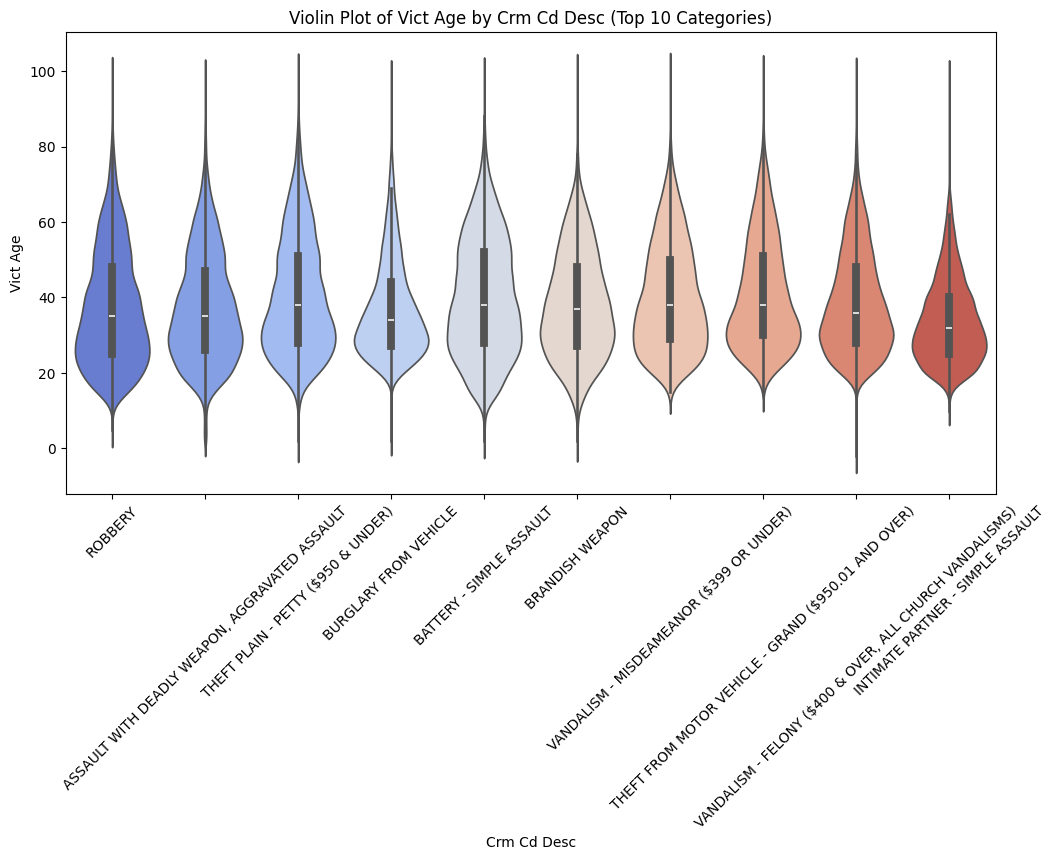

/var/folders/wp/q9yqmlps5m104gvw87tpz3hm0000gn/T/ipykernel_29178/3636060484.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x=cat_col, y=num_col, palette="coolwarm")


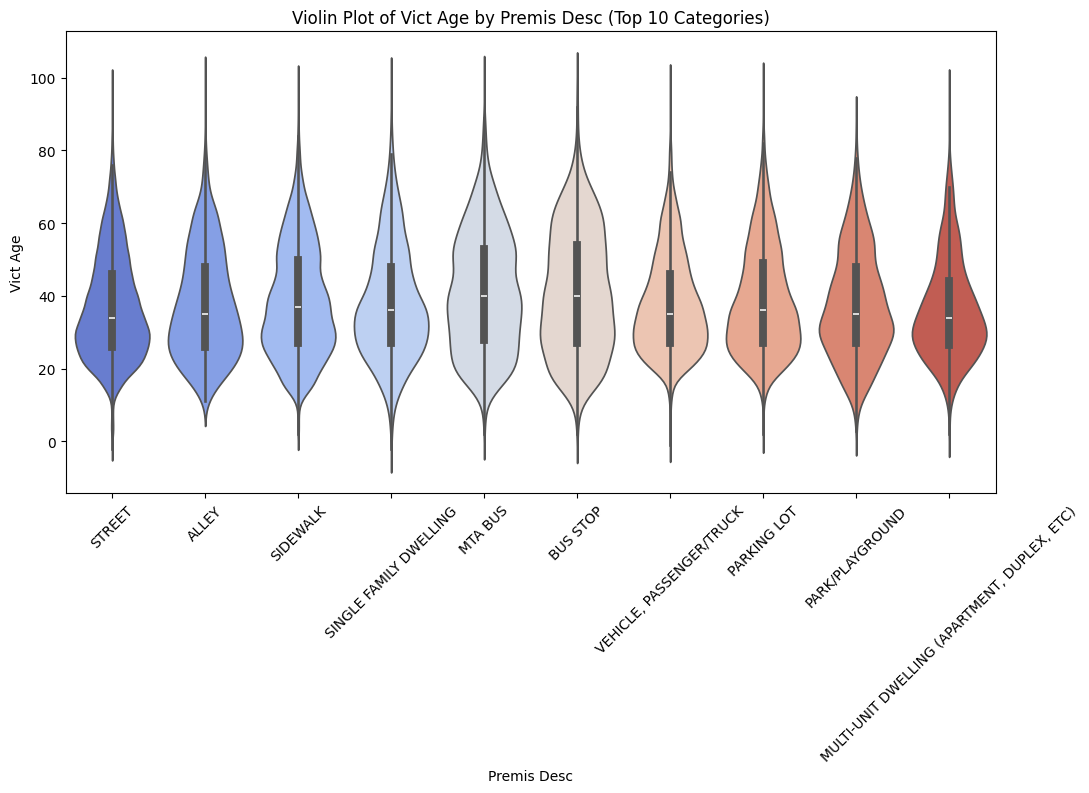

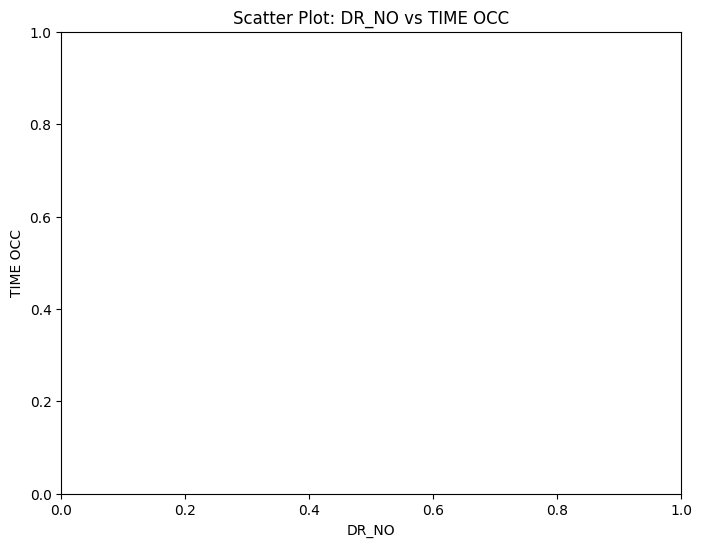

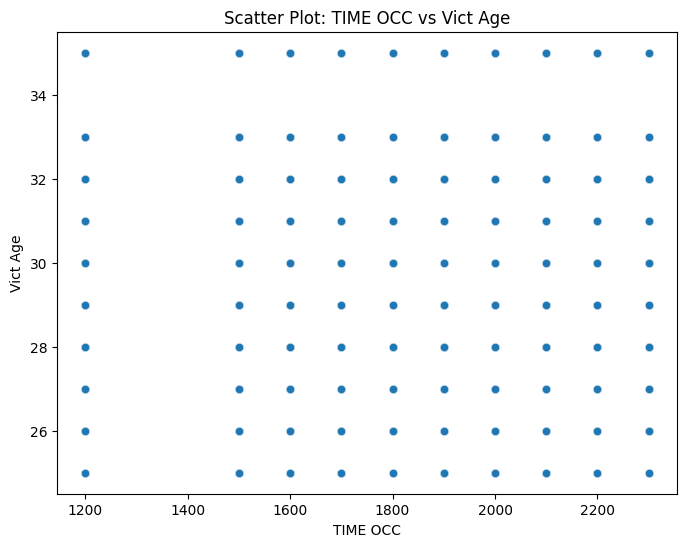

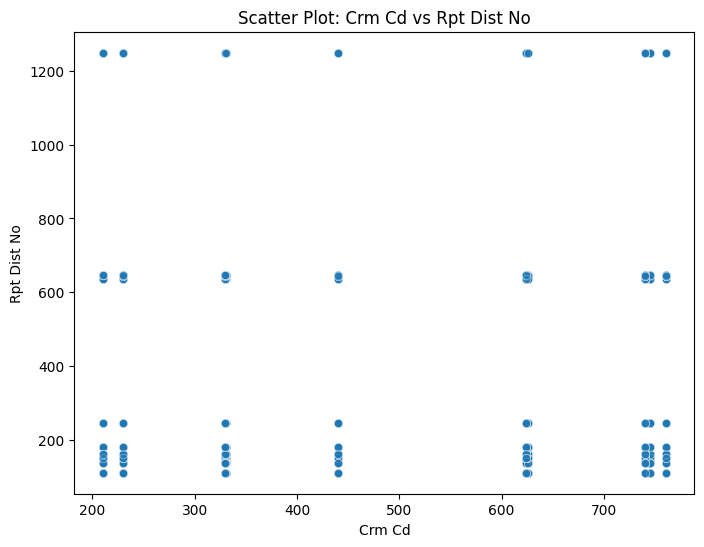

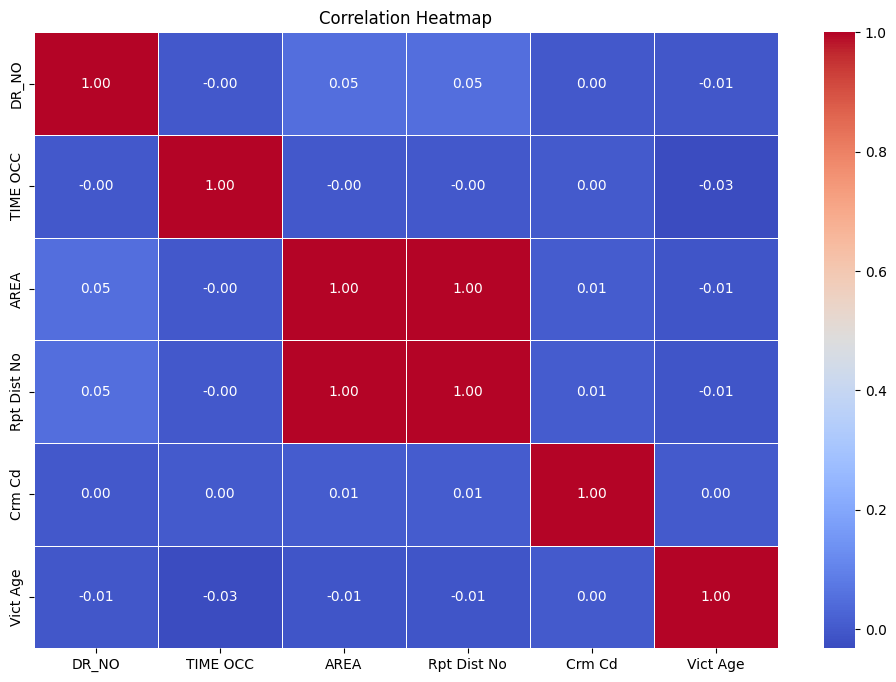

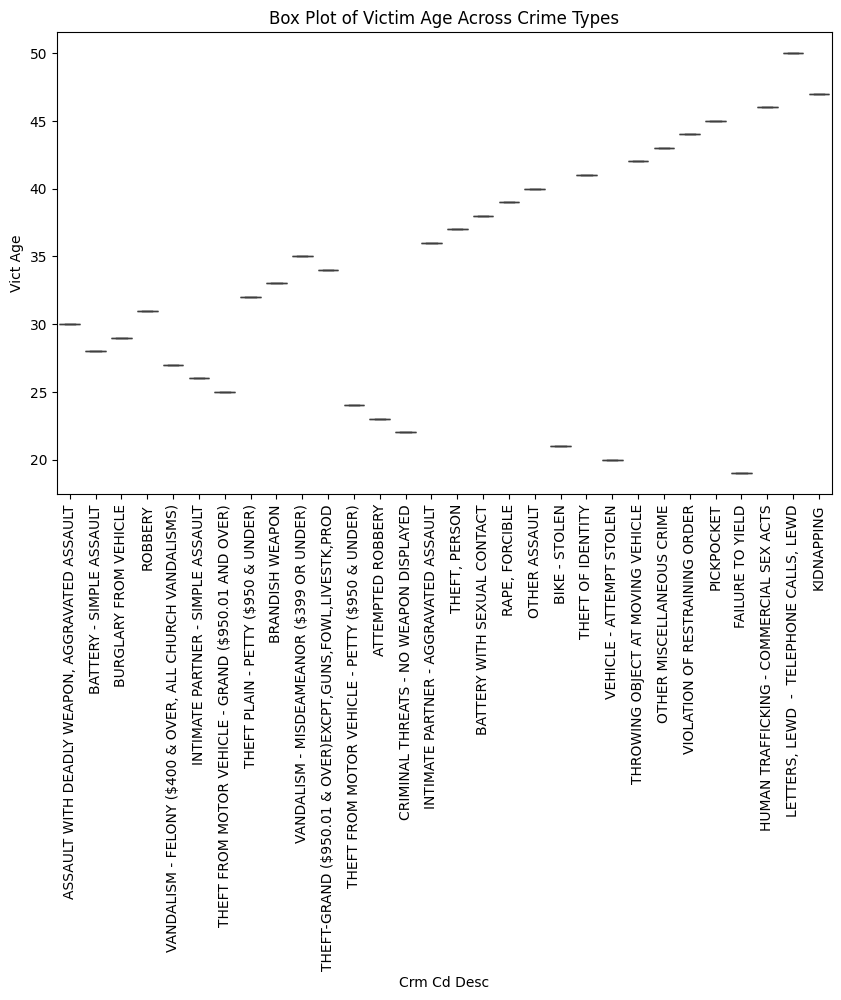

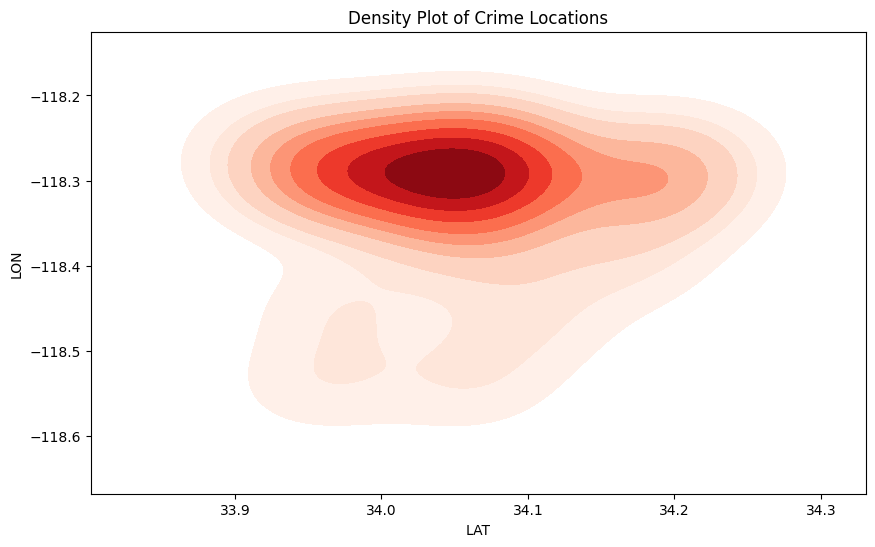

In [10]:
# test that runs data visualization

plotting(df)